## Importing Important liberaries 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the califorina housing dataset

In [19]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

## Understanding the data 

In [20]:
print(california.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [21]:
## checking the description of the dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [22]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [23]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the dataset and basic analysis

In [24]:
dataset = pd.DataFrame(california.data, columns=california.feature_names)

In [25]:
#dataset = dataset.drop(["Latitude", "Longitude"], axis=1)

In [26]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
dataset['Price'] = california.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
# Some info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [29]:
dataset.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

Data has no missing values

In [30]:
## Checking duplicates
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

Data has no duplicates

In [31]:
## Some summary statistics of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Explarotary Data Analysis

#### Important step to check in regression problems is **Correlation**

In [32]:
# Usually between -1:1
#more near to 1 or -1 is highly corellated
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

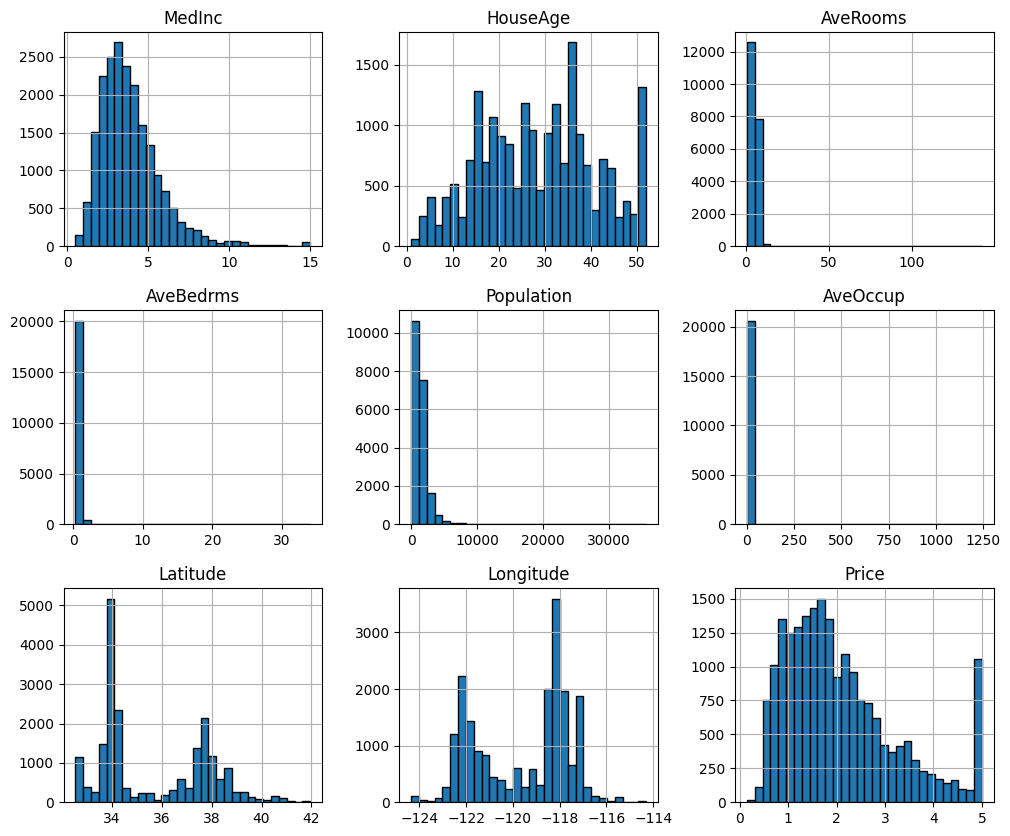

In [33]:
 ## a look at the distribution of these features by plotting their histograms
dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")


In [34]:
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(dataset.shape[0]), size=500, replace=False
)

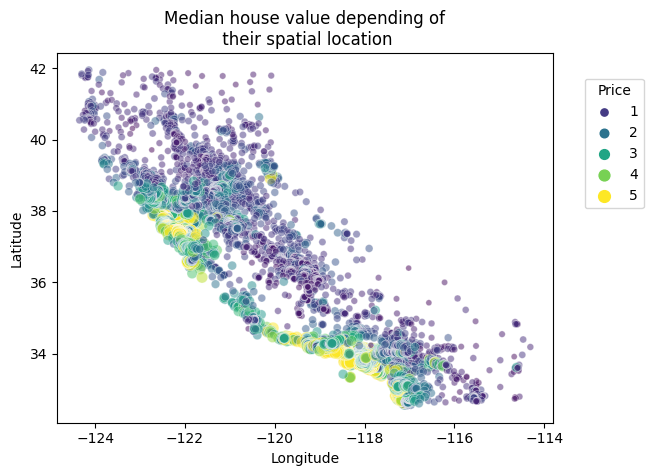

In [35]:
# Creating a scatter plot that visualizes the relationship between the longitude, latitude, and price of houses in a dataset. 
import seaborn as sns
sns.scatterplot(
    data=dataset,
    x="Longitude",
    y="Latitude",
    size="Price",
    hue="Price",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="Price", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [36]:
#We can do a random subsampling to have less data points to plot but that could still allow us to see these specificities.
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(dataset.shape[0]), size=500, replace=False
)
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = dataset.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["Price"] = pd.qcut(subset["Price"], 6, retbins=False)
subset["Price"] = subset["Price"].apply(lambda x: x.mid)

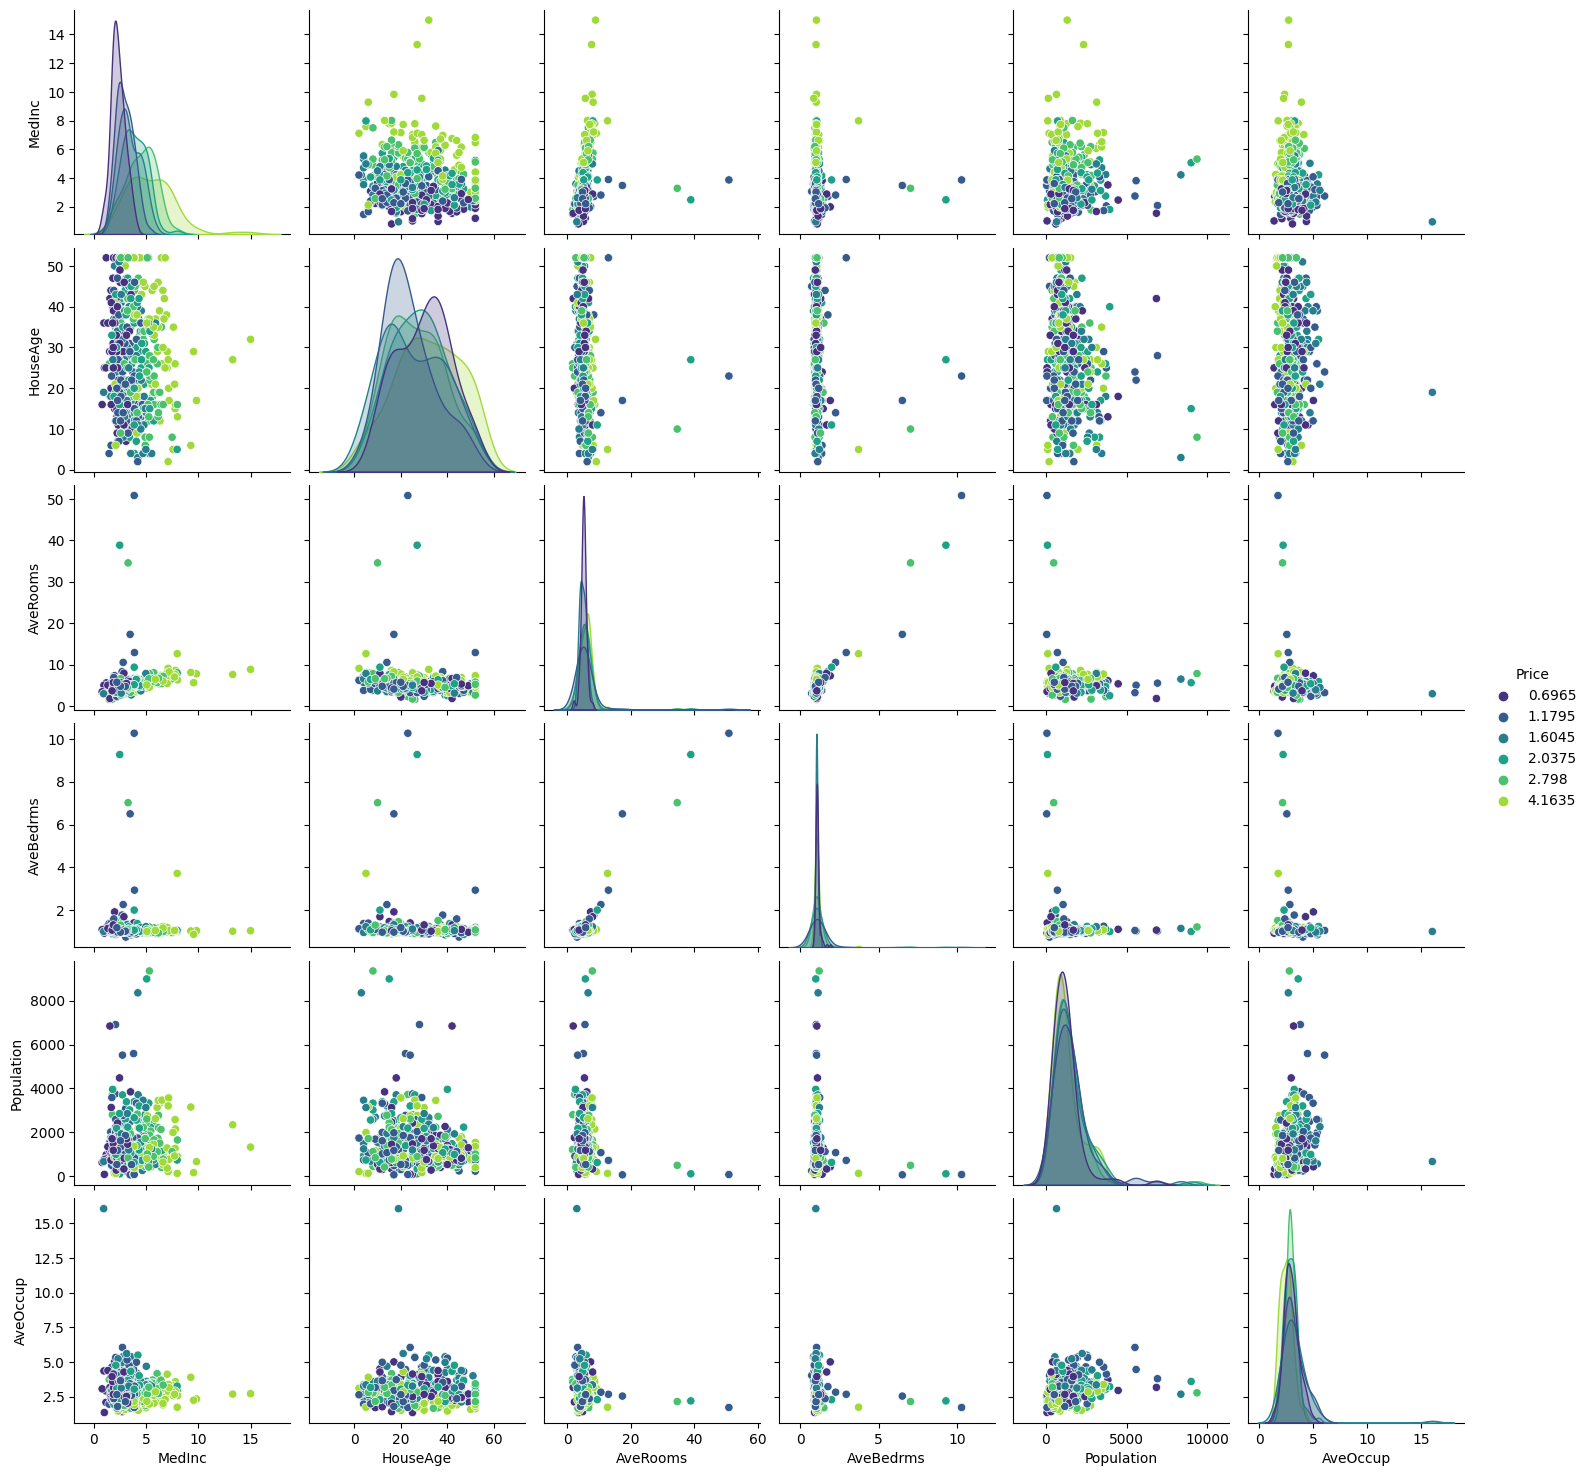

In [37]:
sns.pairplot(data=subset, hue="Price", palette="viridis")


We observe potential outliers in certain features. Additionally, median income is a useful indicator for distinguishing high and low-valued houses.

## Preparing the train and test data

In [38]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [39]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#scaling of the dataset features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [41]:
x_train = sc.fit_transform(X_train)

In [42]:
x_test = sc.transform(X_test)

## Random forest regression

In [43]:
#training the model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [44]:
#predict on the test data
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.51 0.48]
 [0.67 0.46]
 [4.79 5.  ]
 ...
 [2.57 2.18]
 [1.42 1.19]
 [2.21 2.1 ]]


## Evaluating the results

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.788598614810033

I chose RandomForestRegressor because it had the highst accuracy between the models i tried:
 {Linear regression, decision tree, polynomial regression, SVR}